# **Assignment # 1**
---

## **QUESTION # 2**
---

## **Map of UAE**
---

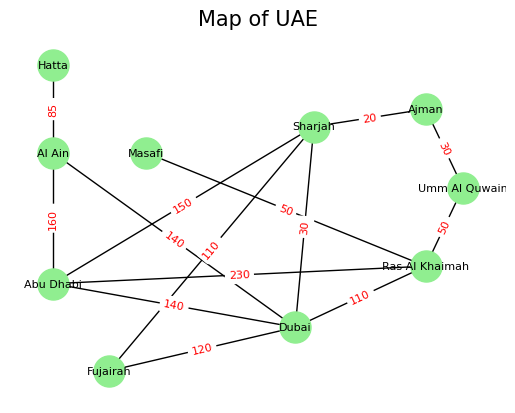

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# UAE cities and their connections (distances in km)
edges = [
    ("Abu Dhabi", "Dubai", 140),
    ("Abu Dhabi", "Al Ain", 160),
    ("Abu Dhabi", "Sharjah", 150),
    ("Dubai", "Sharjah", 30),
    ("Dubai", "Al Ain", 140),
    ("Dubai", "Fujairah", 120),
    ("Sharjah", "Fujairah", 110),
    ("Sharjah", "Ajman", 20),
    ("Ajman", "Umm Al Quwain", 30),
    ("Umm Al Quwain", "Ras Al Khaimah", 50),
    ("Dubai", "Ras Al Khaimah", 110),
    ("Abu Dhabi", "Ras Al Khaimah", 230),
    ("Al Ain", "Hatta", 85),
    ("Ras Al Khaimah", "Masafi", 50),
]

# Add nodes and edges to the graph
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Manually positioning nodes with increased distances for clarity (without Khor Fakkan, Dibba, Kalba)
pos = {
    "Abu Dhabi": (0, 0),
    "Dubai": (13, -5),            # Increased distance from Abu Dhabi
    "Sharjah": (14, 18),          # Increased distance from Dubai
    "Ajman": (20, 20),            # Increased distance from Sharjah
    "Umm Al Quwain": (22, 11),    # Adjusted distance from Ajman
    "Ras Al Khaimah": (20, 2),    # Increased distance
    "Al Ain": (0, 15),            # Increased distance from Abu Dhabi
    "Fujairah": (3, -10),         # Increased distance below Abu Dhabi
    "Hatta": (0, 25),             # Further up from Al Ain
    "Masafi": (5, 15),            # Up from Ras Al Khaimah
}

# Draw the nodes (cities)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightgreen")

# Draw the edges (roads) with distances
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=8)

# Draw the city labels
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")

# Display the graph
plt.title("Map of UAE", fontsize=15)
plt.axis('off')  # Turn off the axis for a cleaner look
plt.show()


**PROBLEM:**
Finding the shortest path between two cities in UAE Ajman and Abu Dhabi using BFS.

# **BREATH FIRST SEARCH BFS**





Shortest path from Ajman to Abu Dhabi: ['Ajman', 'Sharjah', 'Abu Dhabi']

 



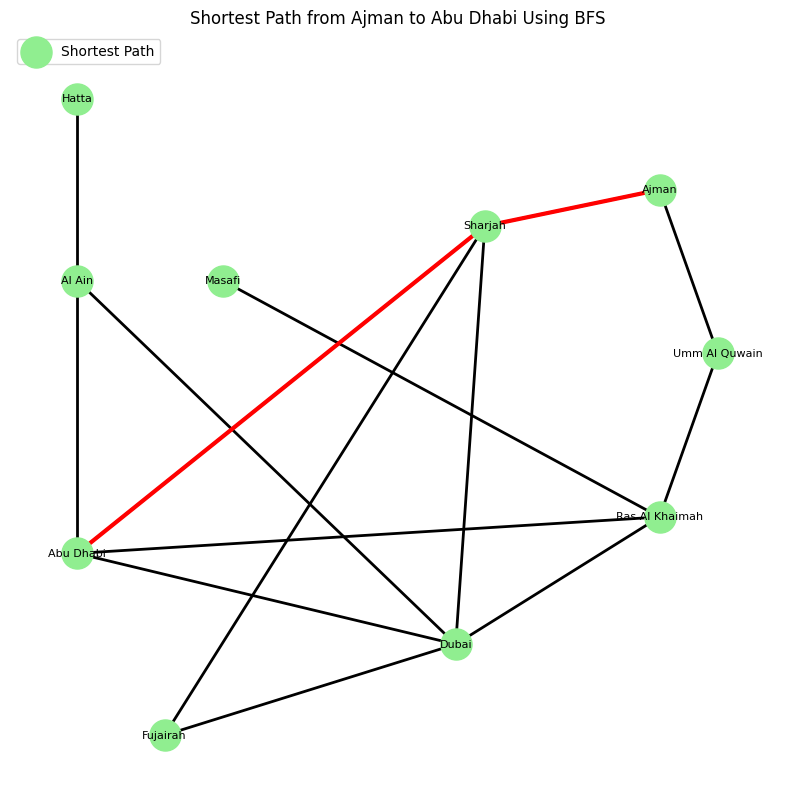

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

def bfs_shortest_path(graph, start, goal):
    # Queue to keep track of the paths to be checked
    queue = deque([[start]])
    visited = set()

    while queue:
        # Dequeue the first path from the queue
        path = queue.popleft()
        # Get the last node in the path
        node = path[-1]

        # Check if we have reached the goal node
        if node == goal:
            return path

        # If the node has not been visited
        if node not in visited:
            for neighbor in graph[node]:
                # Create a new path with the neighbor
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

            # Mark the node as visited
            visited.add(node)

    return None

# Simplified graph of UAE cities
graph_uae = {
    "Abu Dhabi": ["Dubai", "Al Ain", "Sharjah", "Ras Al Khaimah"],
    "Dubai": ["Abu Dhabi", "Sharjah", "Al Ain", "Fujairah", "Ras Al Khaimah"],
    "Sharjah": ["Abu Dhabi", "Dubai", "Fujairah", "Ajman"],
    "Ajman": ["Sharjah", "Umm Al Quwain"],
    "Umm Al Quwain": ["Ajman", "Ras Al Khaimah"],
    "Ras Al Khaimah": ["Abu Dhabi", "Dubai", "Umm Al Quwain", "Masafi"],
    "Al Ain": ["Abu Dhabi", "Dubai", "Hatta"],
    "Fujairah": ["Dubai", "Sharjah"],
    "Masafi": ["Ras Al Khaimah"],
    "Hatta": ["Al Ain"]
}

# Find the shortest path from Ajman to Abu Dhabi
path = bfs_shortest_path(graph_uae, "Ajman", "Abu Dhabi")
print("Shortest path from Ajman to Abu Dhabi:", path)
print("\n \n")
# Visualization of UAE cities
G = nx.Graph()

# Add edges based on the graph structure
for city, neighbors in graph_uae.items():
    for neighbor in neighbors:
        G.add_edge(city, neighbor)

# Manually positioning nodes
pos = {
    "Abu Dhabi": (0, 0),
    "Dubai": (13, -5),
    "Sharjah": (14, 18),
    "Ajman": (20, 20),
    "Umm Al Quwain": (22, 11),
    "Ras Al Khaimah": (20, 2),
    "Al Ain": (0, 15),
    "Fujairah": (3, -10),
    "Masafi": (5, 15),
    "Hatta": (0, 25)
}

# Draw the graph (UAE cities)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightgreen", label="Cities")
nx.draw_networkx_edges(G, pos, width=2)

# Highlight the shortest path in red
if path:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color="red", label="Shortest Path")

# Draw city labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Display the graph
plt.title("Shortest Path from Ajman to Abu Dhabi Using BFS")
plt.axis('off')  # Hide the axis for a cleaner look
plt.legend(["Shortest Path"], loc="upper left")
plt.show()


## **EXPLAINATION:**

### BFS Explanation for the UAE Map:

1. **Queue**: Starts with the path from the starting city (`Ajman`), tracking all possible paths.
2. **Visited Set**: Keeps track of cities already explored to avoid cycles.
3. **Goal Check**: Each path's last city is checked to see if it’s the goal city (`Abu Dhabi`).
4. **Expanding Paths**: If not at the goal, the path is extended to neighboring cities, and new paths are added to the queue.
5. **Repeat**: This process continues until the goal city is found or all paths are exhausted, ensuring the shortest path is found.

In the visualization, the shortest path from **Ajman to Abu Dhabi** is clearly shown on the UAE map.

**PROBLEM:**
Finding the shortest path between two cities in UAE Ajman and Abu Dhabi using UCS.

# **UNIFORM COST SEARCH UCS**





Shortest path from Ajman to Abu Dhabi: ['Ajman', 'Sharjah', 'Abu Dhabi']
Total cost of the path: 170


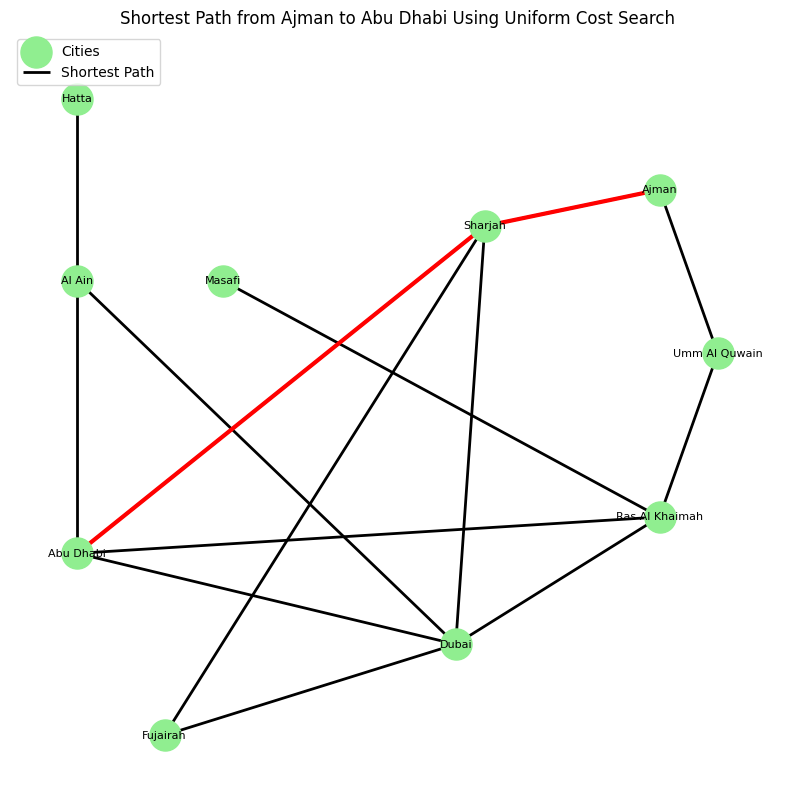

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

def uniform_cost_search(graph, start, goal):
    # Priority queue to keep track of the least-cost paths to be explored
    priority_queue = [(0, [start])]  # (cost, path)

    # Set for visited nodes
    visited = set()

    # Loop until the priority queue is empty
    while priority_queue:
        # Dequeue the path with the lowest cumulative cost
        current_cost, path = heapq.heappop(priority_queue)

        node = path[-1]

        # Check if we have reached the goal node
        if node == goal:
            return path, current_cost

        # If the node has not been visited
        if node not in visited:
            visited.add(node)

            # Exploring neighboring nodes and their costs
            for neighbor, cost in graph[node]:
                if neighbor not in visited:
                    # Create a new path with the neighbor
                    new_path = list(path)
                    new_path.append(neighbor)
                    # Add the new path to the priority queue
                    heapq.heappush(priority_queue, (current_cost + cost, new_path))

    return None

# Simplified graph of UAE cities with distances
graph_uae = {
    "Abu Dhabi": [("Dubai", 140), ("Al Ain", 160), ("Sharjah", 150), ("Ras Al Khaimah", 230)],
    "Dubai": [("Abu Dhabi", 140), ("Sharjah", 30), ("Al Ain", 140), ("Fujairah", 120), ("Ras Al Khaimah", 110)],
    "Sharjah": [("Abu Dhabi", 150), ("Dubai", 30), ("Fujairah", 110), ("Ajman", 20)],
    "Ajman": [("Sharjah", 20), ("Umm Al Quwain", 20)],
    "Umm Al Quwain": [("Ajman", 20), ("Ras Al Khaimah", 50)],
    "Ras Al Khaimah": [("Abu Dhabi", 230), ("Dubai", 110), ("Umm Al Quwain", 50), ("Masafi", 50)],
    "Al Ain": [("Abu Dhabi", 160), ("Dubai", 140), ("Hatta", 85)],
    "Fujairah": [("Dubai", 120), ("Sharjah", 110)],
    "Masafi": [("Ras Al Khaimah", 50)],
    "Hatta": [("Al Ain", 85)]
}

# Find the shortest path from Ajman to Abu Dhabi using Uniform Cost Search
path, cost = uniform_cost_search(graph_uae, "Ajman", "Abu Dhabi")
print("Shortest path from Ajman to Abu Dhabi:", path)
print("Total cost of the path:", cost)

# Visualization of UAE cities
G = nx.Graph()

# Add edges based on the graph structure
for city, neighbors in graph_uae.items():
    for neighbor, cost in neighbors:
        G.add_edge(city, neighbor, weight=cost)

# Manually positioning nodes
pos = {
    "Abu Dhabi": (0, 0),
    "Dubai": (13, -5),
    "Sharjah": (14, 18),
    "Ajman": (20, 20),
    "Umm Al Quwain": (22, 11),
    "Ras Al Khaimah": (20, 2),
    "Al Ain": (0, 15),
    "Fujairah": (3, -10),
    "Masafi": (5, 15),
    "Hatta": (0, 25)
}

# Draw the graph (UAE cities)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightgreen", label="Cities")
nx.draw_networkx_edges(G, pos, width=2)

# Highlight the shortest path in red
if path:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color="red", label="Shortest Path")

# Draw city labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Display the graph
plt.title("Shortest Path from Ajman to Abu Dhabi Using Uniform Cost Search")
plt.axis('off')  # Hide the axis for a cleaner look
plt.legend(["Cities", "Shortest Path"], loc="upper left")
plt.show()


### Explanation of Uniform Cost Search (UCS) for the UAE Map:

1. **Data Structures**:
   - **Priority Queue**: Maintains paths based on cumulative distances from the starting city (Ajman). Each entry consists of the total distance and the path taken.
   - **Visited Set**: Tracks explored cities to avoid revisiting them, preventing loops and redundant calculations.

2. **Algorithm Steps**:
   - Initialize the priority queue with Ajman and a distance of zero.
   - Loop until the queue is empty:
     - Dequeue the path with the lowest cumulative distance.
     - If the last city in the path is Abu Dhabi, return the path and total distance.
     - Mark the current city as visited.
     - Explore neighboring cities, creating new paths and calculating their distances, then add them to the queue for further exploration.
   
### Summary:
UCS efficiently finds the shortest path from Ajman to Abu Dhabi on the UAE map by prioritizing routes based on distance. This approach ensures the optimal travel route is identified among multiple city connections.